In [1]:
!pip install pyswarms

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Import PySwarms
import pyswarms as ps

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
# Load the iris dataset
data = pd.read_csv("penguins.csv")

In [4]:
panjangPenguin = len(data)
for i in range(panjangPenguin):
  if data['species'][i] == "Adelie":
    data['species'][i] = 0
  elif data['species'][i] == "Gentoo":
    data['species'][i] = 1
  elif data['species'][i] == "Chinstrap":
    data['species'][i] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
data['species']

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species, Length: 333, dtype: object

In [6]:
# Store the features as X and the labels as y
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values.astype(int)
y = data['species'].values.astype(int)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [8]:
# Forward propagation
def forward_prop(params):
    """Forward propagation as objective function

    This computes for the forward propagation of the neural network, as
    well as the loss. It receives a set of parameters that must be
    rolled-back into the corresponding weights and biases.

    Inputs
    ------
    params: np.ndarray
        The dimensions should include an unrolled version of the
        weights and biases.

    Returns
    -------
    float
        The computed negative log-likelihood loss given the parameters
    """
    # Neural network architecture
    n_inputs = 4
    n_hidden = 20
    n_classes = 3

    # Roll-back the weights and biases
    W1 = params[0:80].reshape((n_inputs,n_hidden))
    b1 = params[80:100].reshape((n_hidden,))
    W2 = params[100:160].reshape((n_hidden,n_classes))
    b2 = params[160:163].reshape((n_classes,))

    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood
    N = 333 # Number of samples
    corect_logprobs = -np.log(probs[range(N), y])
    loss = np.sum(corect_logprobs) / N

    return loss

In [9]:
def f(x):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [10]:
cost_per_epoch = []
pos_per_epoch = []
def optimizeResult():
  cost, pos = optimizer.optimize(f, iters=1, verbose=True)#, print_step=100
  cost_per_epoch.append(cost)
  pos_per_epoch.append(pos)

In [11]:
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
dimensions = (4 * 20) + (20 * 3) + 20 + 3
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=dimensions, options=options)

# Perform optimization
iterations = 1000 # Set 100 iterations
for i in range(iterations):
  optimizeResult()
for i in range(iterations):
  if i%100==0:
    print('Iteration: {} | my_swarm.best_cost: {:.4f}'.format(i+1, cost_per_epoch[i]))

Output streaming akan dipotong hingga 5000 baris terakhir.
  0.91295548 -3.52640206  1.15624508  2.54366792 -0.26190561  1.18849148
  0.88511556  0.98746251  0.93430126  1.00793952  0.98630142  0.54429134
  0.91142647  0.81250189  0.64317903  0.59547699  0.69404904  1.23134249
  0.20900378  1.60391362  1.05649713  0.9845068   0.81265204  0.01636213
 -0.00799613  1.13482543  1.21224195  1.2766799   2.98808486  0.77942367
  0.61197617  0.98367598  0.94891829  1.45132984  0.96243554  0.98101739
  0.42724212  0.7028773   0.90858132  1.60954422  1.10148264  1.57762603
  0.30921686  1.68953838  1.01869948  2.97601814  2.30444632  0.98870178
  0.50292085  2.52755226  0.64059662  1.16951999  0.74671139  0.48703952
  0.84186569  1.50979347 -0.1609399   0.67065365  2.03305103  1.56088934
  1.91998149  1.58207709  0.89081205  0.8338997   1.25978245  0.95864724
  1.32531268 -0.17298236  0.54686555  0.17742672  1.77593237  1.15554866
  0.19716828  0.84187745  1.25525565  0.99834434 -0.36933926  1.7

Iteration: 1 | my_swarm.best_cost: 1.0609
Iteration: 101 | my_swarm.best_cost: 0.7448
Iteration: 201 | my_swarm.best_cost: 0.5964
Iteration: 301 | my_swarm.best_cost: 0.5450
Iteration: 401 | my_swarm.best_cost: 0.5030
Iteration: 501 | my_swarm.best_cost: 0.4959
Iteration: 601 | my_swarm.best_cost: 0.4921
Iteration: 701 | my_swarm.best_cost: 0.4912
Iteration: 801 | my_swarm.best_cost: 0.4910
Iteration: 901 | my_swarm.best_cost: 0.4909


In [12]:
def predict(X, pos):
    """
    Use the trained weights to perform class predictions.
    
    Inputs
    ------
    X: numpy.ndarray
        Input Iris dataset
    pos: numpy.ndarray
        Position matrix found by the swarm. Will be rolled
        into weights and biases.
    """
    # Neural network architecture
    n_inputs = 4
    n_hidden = 20
    n_classes = 3
    
    # Roll-back the weights and biases
    W1 = pos[0:80].reshape((n_inputs,n_hidden))
    b1 = pos[80:100].reshape((n_hidden,))
    W2 = pos[100:160].reshape((n_hidden,n_classes))
    b2 = pos[160:163].reshape((n_classes,))
    #print (W1)
    #print (b1)
    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2
    
    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [18]:
panjangPos = len(pos_per_epoch)
accuracy = []
for k in range(panjangPos):
  Test_acc = (predict(X, pos_per_epoch[k]) == y).mean()
  accuracy.append(Test_acc)
print(Test_acc)

0.7957957957957958


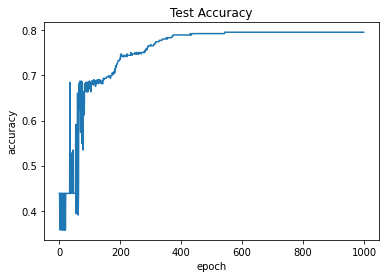

In [19]:
# plot of accuracy
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.title('Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [20]:
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

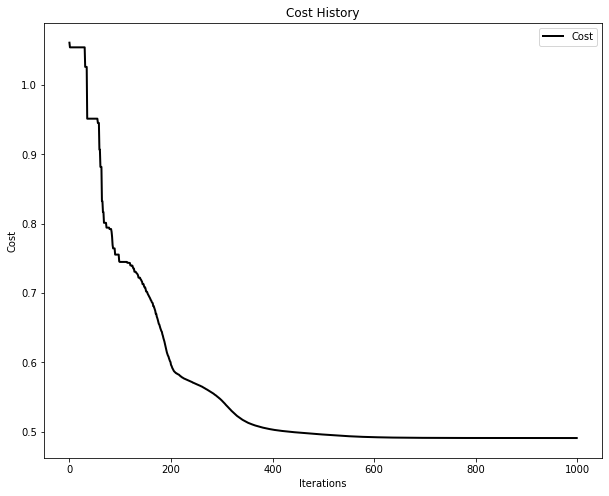

In [21]:
plot_cost_history(cost_history=optimizer.cost_history)#optimizer.cost_history
plt.show()